# Project

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sys
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

In [11]:
import torch
import torchvision
from torchvision import transforms
import numpy as np

# Define a transform to convert PIL images to flat numpy arrays
transform = transforms.Compose([
    transforms.ToTensor(),                 # Converts to tensor [0,1], shape [1,28,28]
    transforms.Lambda(lambda x: x.view(-1))  # Flattens to 784-d vector
])

# Download and load training data
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Convert full dataset to numpy arrays
images = np.stack([mnist_dataset[i][0].numpy() for i in range(len(mnist_dataset))])
labels = np.array([mnist_dataset[i][1] for i in range(len(mnist_dataset))])

# Split into training and validation
validation_m_size = 10000
Data_m_train = images[validation_m_size:]
Labels_m_train = labels[validation_m_size:]

Data_m_validation = images[:validation_m_size]
Labels_m_validation = labels[:validation_m_size]

# Optional: Print shape
print("Train data shape:", Data_m_train.shape)
print("Validation data shape:", Data_m_validation.shape)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████████████████| 9912422/9912422 [03:01<00:00, 54494.03it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 30173.56it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:19<00:00, 84797.33it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4543412.54it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Train data shape: (50000, 784)
Validation data shape: (10000, 784)


# Neural network

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the neural network architecture with a feature extraction method
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(Data_m_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax', name='output_layer')
])

# Function to create a model that includes only the part up to the last hidden layer (for feature extraction)
feature_extractor = models.Model(
    inputs=model.inputs,
    outputs=model.get_layer('output_layer').input,  # Get the input of the output layer, which is the output of the last hidden layer
)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(Data_m_train, Labels_m_train, epochs=5, validation_data=(Data_m_validation, Labels_m_validation))

# Now, use the feature_extractor model to get features
features_train = feature_extractor.predict(Data_m_train)
features_validation = feature_extractor.predict(Data_m_validation)

# 'features_train' and 'features_validation' now contain the extracted features from the training and validation datasets


Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3230 - accuracy: 0.9055 - val_loss: 0.1653 - val_accuracy: 0.9503
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1554 - accuracy: 0.9544 - val_loss: 0.1220 - val_accuracy: 0.9648
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1138 - accuracy: 0.9660 - val_loss: 0.1093 - val_accuracy: 0.9688
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0933 - accuracy: 0.9716 - val_loss: 0.0924 - val_accuracy: 0.9718
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0686 - accuracy: 0.9790 - val_loss: 0.0784 - val_accuracy: 0.9765
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0601 - accuracy: 0.9813 - val_loss: 0.0757 - val_accuracy: 0.9780
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0537 - accuracy: 0.9827 - val_loss: 0.0866 - val_accuracy: 0.9745
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0470 - accuracy: 0.9847 - val_loss: 0.0825 - val_accuracy: 0.9774
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0464 - accuracy: 0.9848 - val_loss: 0.0824 - val_accuracy: 0.9774


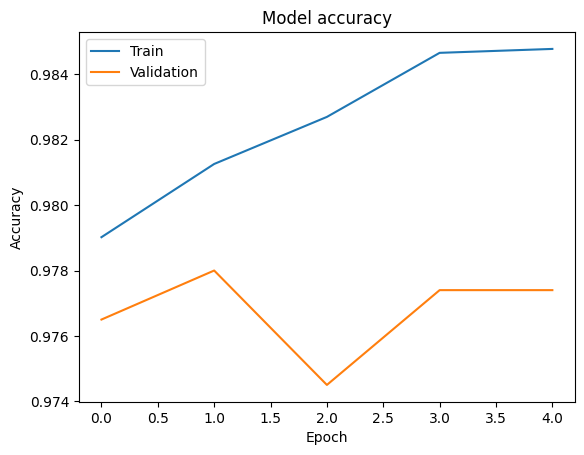

In [13]:
import matplotlib.pyplot as plt

history = model.fit(Data_m_train, Labels_m_train, epochs=5, validation_data=(Data_m_validation, Labels_m_validation))

# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier on the training features and labels
svm_classifier.fit(features_train, Labels_m_train)

# Predict the labels of the validation set
predictions = svm_classifier.predict(features_validation)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(Labels_m_validation, predictions)

print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Validation Accuracy: 97.62%


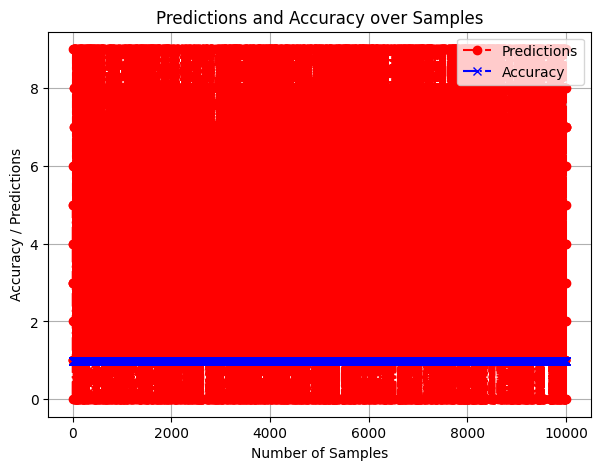

In [15]:
import matplotlib.pyplot as plt

# Create a range object for the x-axis based on the number of predictions
num_samples = range(len(predictions))

accuracy_samples = [accuracy] * len(predictions)

# Set up the plot
plt.figure(figsize=(7, 5))

# Plot predictions and accuracy
plt.plot(num_samples, predictions, label='Predictions', marker='o', color='red', linestyle='-.')
plt.plot(num_samples, accuracy_samples, label='Accuracy', marker='x', color='blue', linestyle='-.')

# Add labels, title, grid, and legend
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy / Predictions')
plt.title('Predictions and Accuracy over Samples')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


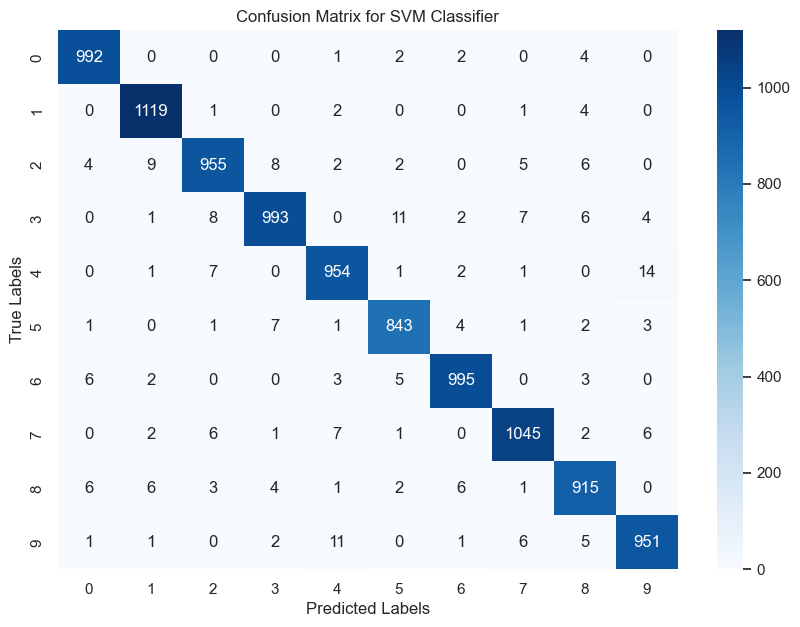

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()  # for plot styling

# Assuming predictions are made as 'predictions' using the SVM classifier
conf_mat = confusion_matrix(Labels_m_validation, predictions)

plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


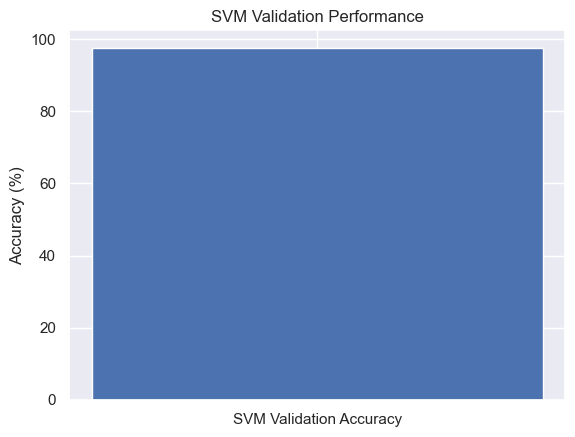

In [17]:
svm_accuracy = [accuracy * 100] 

plt.bar(['SVM Validation Accuracy'], svm_accuracy)
plt.ylabel('Accuracy (%)')
plt.title('SVM Validation Performance')
plt.show()


# LDA 1

Accuracy: 89.16%
Precision: 89.11%


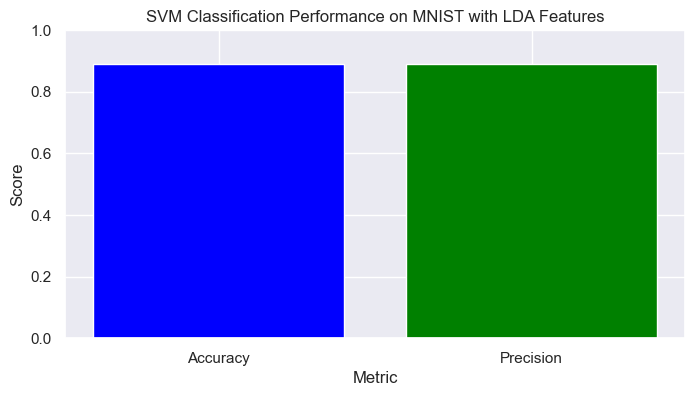

In [18]:
# Import necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt
import numpy as np

# Apply LDA for feature extraction
lda = LinearDiscriminantAnalysis()
Data_m_train_lda = lda.fit_transform(Data_m_train, Labels_m_train)
Data_m_validation_lda = lda.transform(Data_m_validation)

# Train SVM on the LDA features
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(Data_m_train_lda, Labels_m_train)

# Evaluate the SVM on the validation set
Labels_m_pred = svm_classifier.predict(Data_m_validation_lda)
accuracy = accuracy_score(Labels_m_validation, Labels_m_pred)
precision = precision_score(Labels_m_validation, Labels_m_pred, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
# Plotting the results
metrics = ['Accuracy', 'Precision']
scores = [accuracy, precision]

plt.figure(figsize=(8, 4))
plt.bar(metrics, scores, color=['blue', 'green'])
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('SVM Classification Performance on MNIST with LDA Features')
plt.ylim(0, 1)
plt.show()


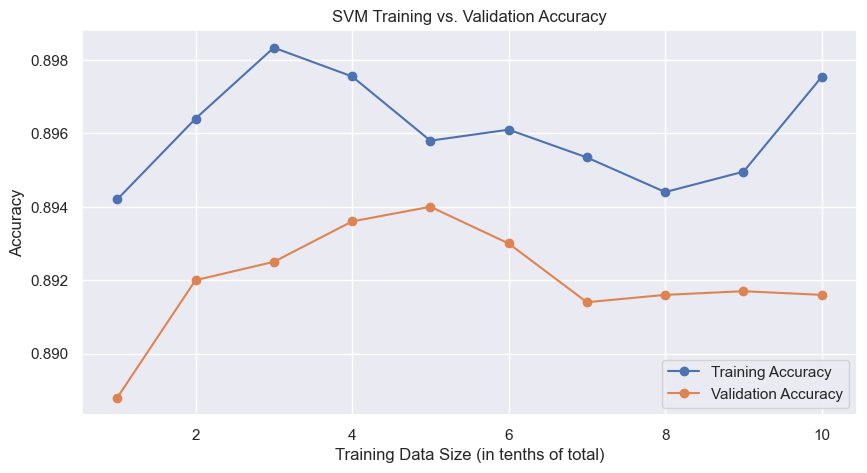

In [19]:
from sklearn.model_selection import train_test_split

# Define the number of splits
n_splits = 10
subset_size = len(Data_m_train) // n_splits

# Initialize lists to store accuracies
train_accuracies = []
validation_accuracies = []

for i in range(1, n_splits + 1):
    # Incrementally increase training data size
    end_index = i * subset_size
    partial_train_data = Data_m_train_lda[:end_index]
    partial_train_labels = Labels_m_train[:end_index]
    
    # Train the SVM classifier on the current subset of training data
    svm_classifier = SVC(kernel='linear', random_state=42)
    svm_classifier.fit(partial_train_data, partial_train_labels)
    
    # Calculate training accuracy
    train_preds = svm_classifier.predict(partial_train_data)
    train_accuracy = accuracy_score(partial_train_labels, train_preds)
    train_accuracies.append(train_accuracy)
    
    # Calculate validation accuracy
    validation_preds = svm_classifier.predict(Data_m_validation_lda)
    validation_accuracy = accuracy_score(Labels_m_validation, validation_preds)
    validation_accuracies.append(validation_accuracy)

# Plot the training and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_splits + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, n_splits + 1), validation_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Training Data Size (in tenths of total)')
plt.ylabel('Accuracy')
plt.title('SVM Training vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


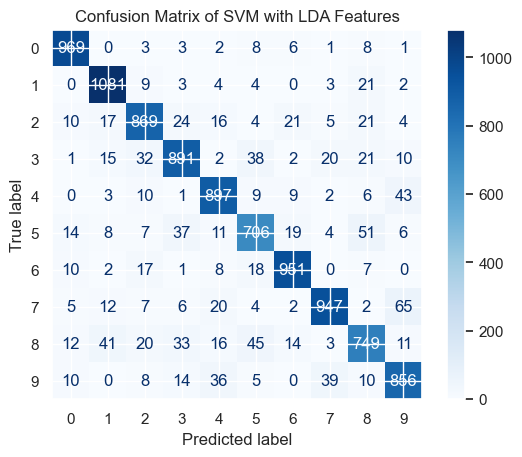

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Plotting the confusion matrix
conf_matrix = confusion_matrix(Labels_m_validation, Labels_m_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of SVM with LDA Features')
plt.show()


# LDA 2

Accuracy: 86.80%
Precision: 87.05%


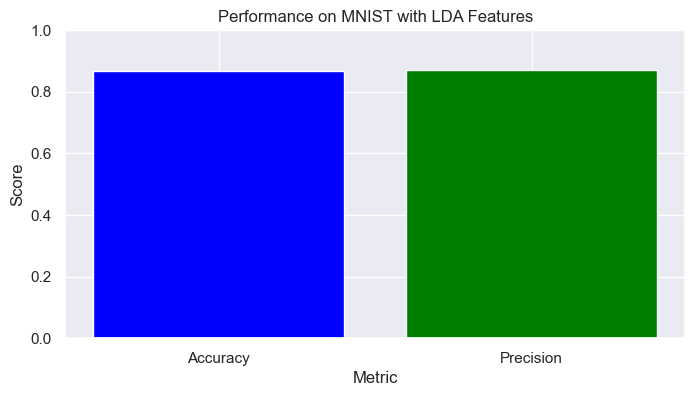

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

# generate random dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, n_classes=3, random_state=42)

# split dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create LDA model
lda = LinearDiscriminantAnalysis()

# train LDA model on training data
lda.fit(Data_m_train, Labels_m_train)

# make predictions on testing data
y_pred = lda.predict(Data_m_validation)

# calculate accuracy score
accuracy = accuracy_score(Labels_m_validation, y_pred)
precision = precision_score(Labels_m_validation, y_pred, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
# Plotting the results
metrics = ['Accuracy', 'Precision']
scores = [accuracy, precision]

plt.figure(figsize=(8, 4))
plt.bar(metrics, scores, color=['blue', 'green'])
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance on MNIST with LDA Features')
plt.ylim(0, 1)
plt.show()


SVM Accuracy: 89.16%
SVM Precision: 87.05%


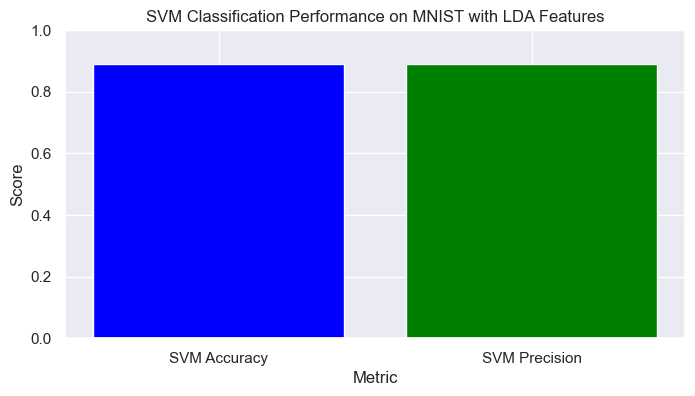

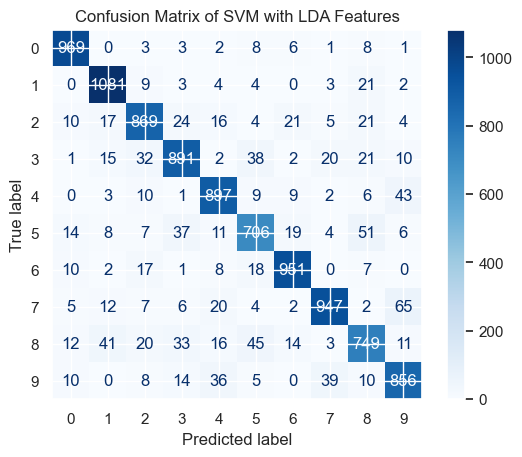

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Transform both training and validation data with LDA
X_train_lda = lda.transform(Data_m_train)
X_validation_lda = lda.transform(Data_m_validation)

# Create an SVM model with the linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model on the LDA-transformed training data
svm_model.fit(X_train_lda, Labels_m_train)

# Make predictions on the LDA-transformed validation data
svm_predictions = svm_model.predict(X_validation_lda)

# Calculate the accuracy score
svm_accuracy = accuracy_score(Labels_m_validation, svm_predictions)

# Print the SVM accuracy
print("SVM Accuracy: {:.2f}%".format(svm_accuracy * 100))

svm_precision = precision_score(Labels_m_validation, svm_predictions, average='weighted')

print("SVM Precision: {:.2f}%".format(precision*100))
# Plotting the results
metrics = ['SVM Accuracy', 'SVM Precision']
scores = [svm_accuracy, svm_precision]

plt.figure(figsize=(8, 4))
plt.bar(metrics, scores, color=['blue', 'green'])
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('SVM Classification Performance on MNIST with LDA Features')
plt.ylim(0, 1)
plt.show()

# Plotting the confusion matrix
conf_matrix = confusion_matrix(Labels_m_validation, svm_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of SVM with LDA Features')
plt.show()


SVM Accuracy with RBF kernel: 91.69%
SVM Precision: 87.05%


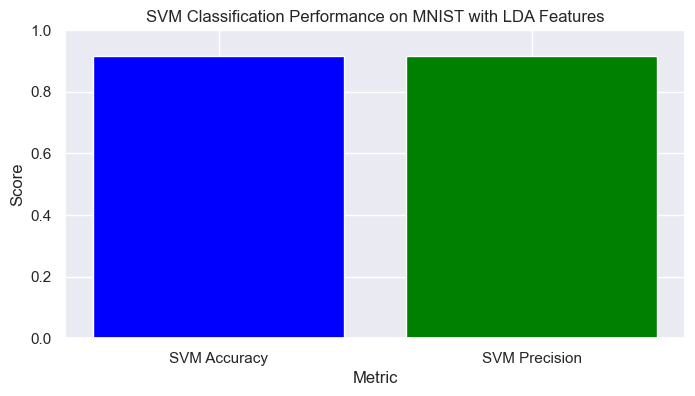

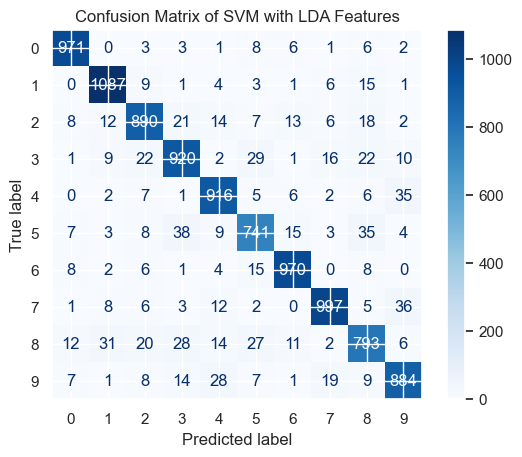

In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

scaler = StandardScaler()

# Apply scaling to the data
Data_m_train_scaled = scaler.fit_transform(Data_m_train)
Data_m_validation_scaled = scaler.transform(Data_m_validation)

# Train LDA on scaled data
lda = LinearDiscriminantAnalysis()
lda.fit(Data_m_train_scaled, Labels_m_train)

# Transform both training and validation data with LDA
X_train_lda = lda.transform(Data_m_train_scaled)
X_validation_lda = lda.transform(Data_m_validation_scaled)

# Create an SVM model with the RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)

# Train the SVM model on the LDA-transformed and scaled training data
svm_model.fit(X_train_lda, Labels_m_train)

# Make predictions on the LDA-transformed and scaled validation data
svm_predictions = svm_model.predict(X_validation_lda)

# Calculate the accuracy score
svm_accuracy = accuracy_score(Labels_m_validation, svm_predictions)

# Print the SVM accuracy
print("SVM Accuracy with RBF kernel: {:.2f}%".format(svm_accuracy * 100))

svm_precision = precision_score(Labels_m_validation, svm_predictions, average='weighted')

print("SVM Precision: {:.2f}%".format(precision*100))
# Plotting the results
metrics = ['SVM Accuracy', 'SVM Precision']
scores = [svm_accuracy, svm_precision]

plt.figure(figsize=(8, 4))
plt.bar(metrics, scores, color=['blue', 'green'])
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('SVM Classification Performance on MNIST with LDA Features')
plt.ylim(0, 1)
plt.show()

# Plotting the confusion matrix
conf_matrix = confusion_matrix(Labels_m_validation, svm_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of SVM with LDA Features')
plt.show()


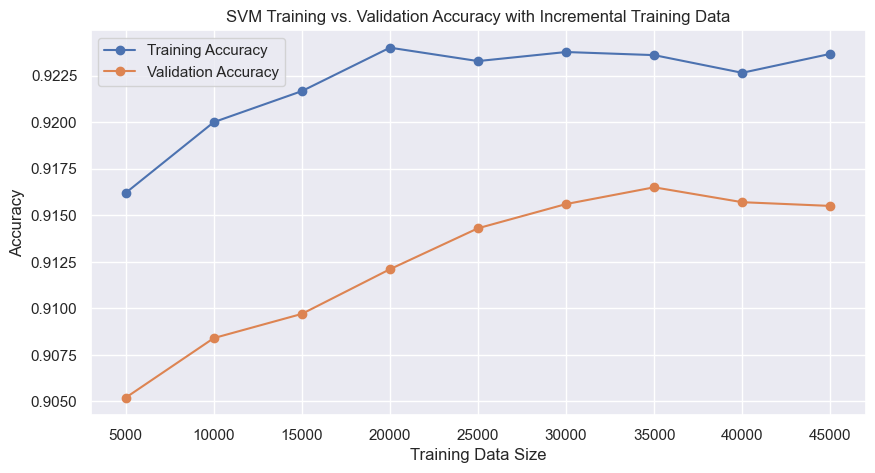

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Number of incremental steps
n_steps = 10
index_steps = np.linspace(0, len(X_train_lda), n_steps, endpoint=False, dtype=int)[1:]

# Lists to store accuracies
training_accuracies = []
validation_accuracies = []

for index in index_steps:
    # Train SVM on the increment of the training data
    svm_incremental = SVC(kernel='rbf', random_state=42)
    svm_incremental.fit(X_train_lda[:index], Labels_m_train[:index])
    
    # Predict on the current training subset for training accuracy
    train_predictions = svm_incremental.predict(X_train_lda[:index])
    training_accuracy = accuracy_score(Labels_m_train[:index], train_predictions)
    training_accuracies.append(training_accuracy)
    
    # Predict on the full validation dataset for validation accuracy
    validation_predictions = svm_incremental.predict(X_validation_lda)
    validation_accuracy = accuracy_score(Labels_m_validation, validation_predictions)
    validation_accuracies.append(validation_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.plot(index_steps, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(index_steps, validation_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.title('SVM Training vs. Validation Accuracy with Incremental Training Data')
plt.legend()
plt.grid(True)
plt.show()
